In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygame as pg
from sklearn import svm

pygame 2.0.0 (SDL 2.0.12, python 3.7.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [46]:
data = []
cluster = []
pg.init()
WHITE = (255, 255, 255)
BLUE = (0, 0, 225)
sc = pg.display.set_mode((400, 300))
sc.fill(WHITE)
pg.display.update()

play = True
while play:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            pg.quit()
            play = False
        if i.type == pg.MOUSEBUTTONDOWN:
            if i.button == 1:
                data.append([i.pos[0], i.pos[1]])
                cluster.append(1)
                pg.draw.circle(sc, (255,0,0), i.pos, 10)
                pg.display.update()
            if i.button == 3:
                data.append([i.pos[0], i.pos[1]])
                cluster.append(-1)
                pg.draw.circle(sc, (0,255,0), i.pos, 10)
                pg.display.update()
        if i.type == pg.KEYDOWN:
            if i.key == pg.K_RIGHT:
                model = svm.SVC(kernel='linear', C=1.0)
                model.fit(data, cluster)
                W=model.coef_[0]
                I=model.intercept_[0]
                a = -W[0]/W[1]
                b = I/W[1]
                main_y = -b
                main_x = b/a                
                line2_y = 1/W[1] - b 
                line2_x = 1/W[0] + b/a
                line3_y = -1/W[1] - b
                line3_x = -1/W[0] + b/a
                
                pg.draw.aaline(sc, (0,0,0), [0, line2_y], [line2_x, 0])
                pg.draw.aaline(sc, (0,0,0), [0, line3_y], [line3_x, 0])
                pg.draw.line(sc, (0,0,0), [0, main_y], [main_x, 0], 2)

                pg.draw.line(sc, (0,0,0), [(300 + b)/a, 300], [0, main_y], 2)
                pg.draw.aaline(sc, (0,0,0), [1/W[0] +(300 + b)/a, 300], [0, line2_y])
                pg.draw.aaline(sc, (0,0,0), [-1/W[0] +(300 + b)/a, 300], [0, line3_y])
                pg.display.update()

Вывод

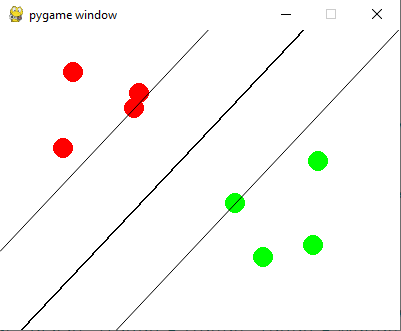

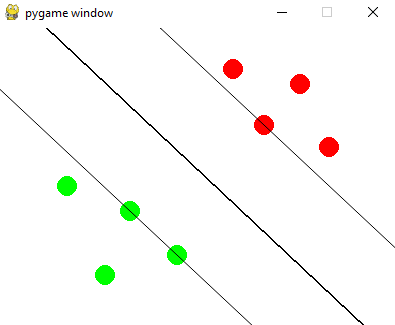